In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

%matplotlib inline

In [2]:
df_ = pd.read_csv('../notebooks/dataset_fifa2019.csv')

In [3]:
df = df_.drop(['Unnamed: 0','ID',
 'Name',
 'Nationality',
 'Club',
 'Preferred Foot'], axis=1)

In [4]:
df

,Age,Overall,Potential,Wage,Special,International Reputation,Weight,Crossing,Finishing,HeadingAccuracy,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Work
0,31,94,94,565000000.0,2202,5.0,159,84.0,95.0,70.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,4
1,33,94,94,405000000.0,2228,5.0,183,84.0,94.0,89.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,4
2,26,92,93,290000000.0,2143,5.0,150,79.0,87.0,62.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,5
3,27,91,92,355000000.0,2281,4.0,154,93.0,82.0,55.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,6
4,27,91,91,340000000.0,2142,4.0,163,81.0,84.0,61.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,19,47,65,1000000.0,1307,1.0,134,34.0,38.0,40.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,4
14739,19,47,63,1000000.0,1098,1.0,170,23.0,52.0,52.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,4
14740,16,47,67,1000000.0,1189,1.0,148,25.0,40.0,46.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,4
14741,17,47,66,1000000.0,1228,1.0,154,44.0,50.0,39.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,4


In [5]:
df_log = np.log(df)

In [6]:
df_log['avg_stats'] = df_log[[ 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes','Work']].mean(axis=1)

In [7]:
df_avg = df_log[['Overall', 'Potential','Weight','International Reputation','Special','avg_stats']]

In [8]:
df_avg

,Overall,Potential,Weight,International Reputation,Special,avg_stats
0,4.543295,4.543295,5.068904,1.609438,7.697121,3.915190
1,4.543295,4.543295,5.209486,1.609438,7.708860,3.943499
2,4.521789,4.532599,5.010635,1.609438,7.669962,3.922834
3,4.510860,4.521789,5.036953,1.386294,7.732369,4.004501
4,4.510860,4.510860,5.093750,1.386294,7.669495,3.889421
...,...,...,...,...,...,...
14738,3.850148,4.174387,4.897840,0.000000,7.175490,3.491922
14739,3.850148,4.143135,5.135798,0.000000,7.001246,3.305873
14740,3.850148,4.204693,4.997212,0.000000,7.080868,3.335899
14741,3.850148,4.189655,5.036953,0.000000,7.113142,3.422278


In [9]:
fifa = df_avg.to_numpy()

In [10]:
import umap

reducer = umap.UMAP(random_state=42)
reducer.fit(fifa.data)

/home/javier/miniconda2/envs/entorno/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../miniconda2/envs/entorno/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/javier/miniconda2/envs/entorno/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../miniconda2/

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=42,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

In [11]:
embedding = reducer.transform(fifa.data)

embedding

array([[  6.8535676,  -1.9762377],
       [  6.8547144,  -1.9746839],
       [  6.855029 ,  -1.9746116],
       ...,
       [-13.732999 ,  -4.667628 ],
       [-13.52734  ,  -4.746125 ],
       [-12.98407  ,  -4.3151593]], dtype=float32)

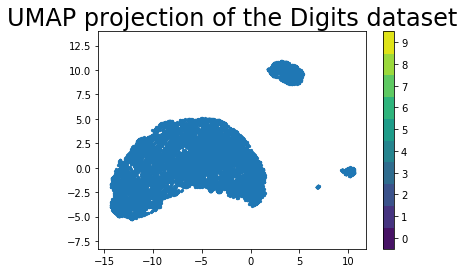

In [12]:
plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

**kmeans**

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42).fit(fifa.data)

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [14]:
kmeans.predict(fifa.data)

array([5, 5, 5, ..., 0, 0, 0], dtype=int32)

In [15]:
kmeans.cluster_centers_[0]

array([ 4.04106395e+00,  4.20479226e+00,  5.07422586e+00, -1.88737914e-15,
        7.23339847e+00,  3.51612012e+00])

In [16]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(embedding)

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

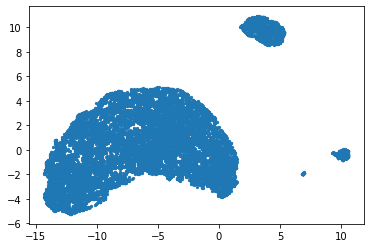

In [17]:
plt.scatter(embedding[:, 0], embedding[:, 1], s=5)
plt.gca().set_aspect('equal', 'datalim')

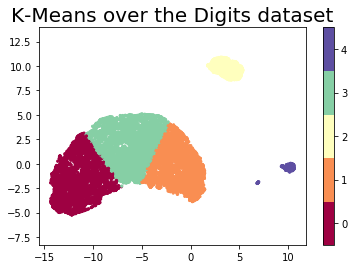

In [18]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(kmeans.n_clusters+1)-0.5).set_ticks(np.arange(kmeans.n_clusters))
plt.title('K-Means over the Digits dataset', fontsize=20);

## **DBSCAN**

In [19]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN().fit(embedding)

clustering

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

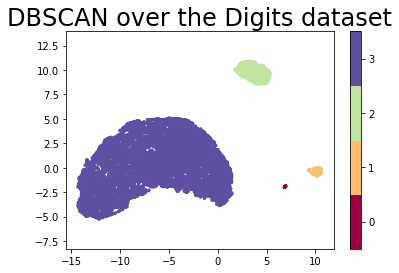

In [20]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=clustering.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(clustering.labels_))+1)-0.5).set_ticks(np.arange(len(np.unique(clustering.labels_))))
plt.title('DBSCAN over the Digits dataset', fontsize=24);

**HDBSCAN**

In [21]:
import hdbscan

clusterer = hdbscan.HDBSCAN()

clusterer.fit(embedding)

clusterer

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

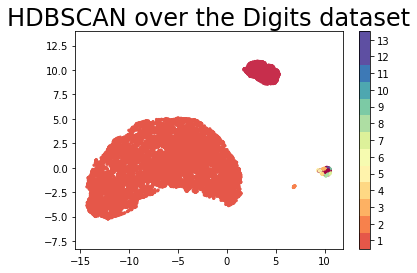

In [22]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusterer.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(clusterer.labels_)))+0.5).set_ticks(np.arange(len(np.unique(clusterer.labels_))))
plt.title('HDBSCAN over the Digits dataset', fontsize=24);

In [23]:
df_['cluster'] = clustering.labels_

In [24]:
df_avg['cluster'] = clustering.labels_

/home/javier/miniconda2/envs/entorno/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df_.to_csv('4_clústers_fifa.csv')

In [26]:
df_avg.to_csv('4_clusteres_fifa_avg_stats.csv')

In [32]:
def exportación (df):
    name_file = '4_clusteres_fifa_avg_stats.csv'
    path = '../data/archivos generados FASE 1'
    output = os.path.join(path, name_file)
    df.to_csv(output, index = False)

In [33]:
exportación (df)